# Plot Audiogram Data from JSON file

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Path to the listeners JSON file
file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Datasets and other Downloads\clarity_CPC1_data.v1_1\clarity_CPC1_data\metadata\listeners.CPC1_train.json"

In [4]:
# Load JSON file
with open(file_path, "r") as f:
    listeners_data = json.load(f)

In [5]:
# Extract frequency values (they are the same for all listeners)
freqs = np.array(listeners_data[next(iter(listeners_data))]["audiogram_cfs"])

In [6]:
from time import sleep
from IPython.display import display, clear_output

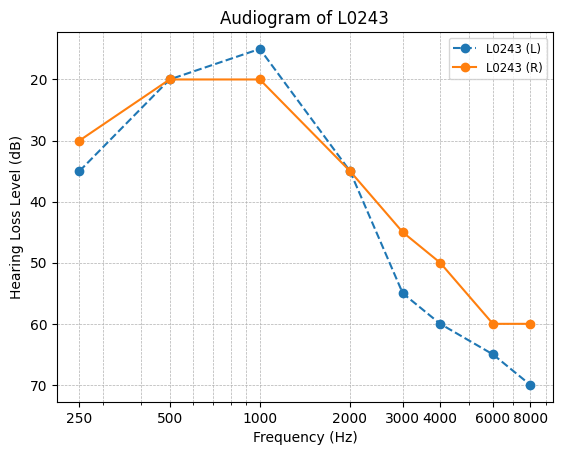

Listener Number: 27 of 27
[35 20 15 35 55 60 65 70]
[30 20 20 35 45 50 60 60]


<Figure size 640x480 with 0 Axes>

In [14]:
listener_number = 1
for listener_id, listener_info in listeners_data.items():
    levels_l = np.array(listener_info["audiogram_levels_l"])
    levels_r = np.array(listener_info["audiogram_levels_r"])


    # Plot audiogram for left and right ears
    plt.plot(freqs, levels_l, label=f"{listener_id} (L)", linestyle="dashed", marker="o")
    plt.plot(freqs, levels_r, label=f"{listener_id} (R)", linestyle="solid", marker="o")

    # Customize the plot
    plt.xscale("log")  # Log scale for better frequency visualization
    plt.xticks(freqs, labels=freqs)  # Keep x-ticks readable
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Hearing Loss Level (dB)")
    plt.title(f"Audiogram of {listener_id}")
    plt.gca().invert_yaxis()  # Hearing loss increases downward
    plt.legend(loc="upper right", fontsize="small")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Clear previous output
    clear_output(wait=True)
    # Display the updated figure
    display(plt.gcf())
    print(f"Listener Number: {listener_number} of {len(listeners_data)}")
    print(levels_l)
    print(levels_r)
    listener_number += 1

    # Pause for animation effect
    sleep(2)
    plt.clf()